In [1]:
import pennylane as qml
import numpy as np

In [2]:
import pennylane as qml
import numpy as np



def construct_oracle_circuit(secret_string):
    """Returns a quantum function (not a QNode) that implements the oracle.

    The oracle should perform the following operation:
        |x>|y> -> |x>|y \oplus f(x, s)>,

    where f(x, s) is the sum of the bitwise product of x and s modulo 2:
        f(x, s) = (x[0] * s[0] + x[1] * s[1] + ...) % 2

    Args:
        secret_string (str): The secret bit string.

    Returns:
        function: A function that applies the sequence of quantum gates
        that will be implemented by the oracle.
    """
    num_qubits = len(secret_string)
    ancilla = num_qubits

    def oracle_circuit():
        for i in range(num_qubits):
            if secret_string[i] == "1":
                qml.MultiControlledX(wires=(i,ancilla))

    return oracle_circuit


def find_secret_string(secret_string):
    """Find a secret bit string s by implementing the Bernstein-Vazirani algorithm.

    You will need to use construct_oracle_circuit to construct the oracle
    outside the QNode, and then use that oracle in your QNode (this is to make
    it feel more like the string is a secret, as it allows the oracle to be
    called without any additional arguments). Feel free to add additional
    functions to add more layers of abstraction to the algorithm.

    Args:
        secret_string (str): A secret, 5-bit string.

    Returns:
        qml.QNode: A QNode that implements Bernstein-Vazirani. The output of the
        QNode should be a single sample of 5 bits that matches the secret string.
    """
    dev = qml.device("default.qubit", wires=len(secret_string) + 1, shots=1)

    @qml.qnode(dev)
    def bernstein_vazirani():
        """The Bernstein-Vazirani algorithm."""

        qml.PauliX(wires=len(secret_string))

        qml.Barrier()

        # Hadamard on each qubit
        for i in range(len(secret_string) + 1):
            qml.Hadamard(wires=i)

        qml.Barrier()

        construct_oracle_circuit(secret_string)()

        qml.Barrier()

        # Hadamard on each qubit
        for i in range(len(secret_string) + 1):
            qml.Hadamard(wires=i)

        qml.Barrier()

        # Sample n qubits

        # ret_string = ""
        # for i in range(len(secret_string)):
        #     ret_string += qml.sample(qml.PauliZ(wires=i))

        # return qml.sample(qml.PauliZ(wires=0)), qml.sample(qml.PauliZ(wires=1)), qml.sample(qml.PauliZ(wires=2)), qml.sample(qml.PauliZ(wires=3)), qml.sample(qml.PauliZ(wires=4))
        # return qml.sample(wires=[0,1,2,3,4])
        return qml.sample(wires=[i for i in range(len(secret_string))])


    return bernstein_vazirani

secret_string = "00110"
find_secret_string(secret_string)()

tensor([0, 0, 1, 1, 0], requires_grad=True)

(<Figure size 1200x700 with 1 Axes>, <Axes: >)

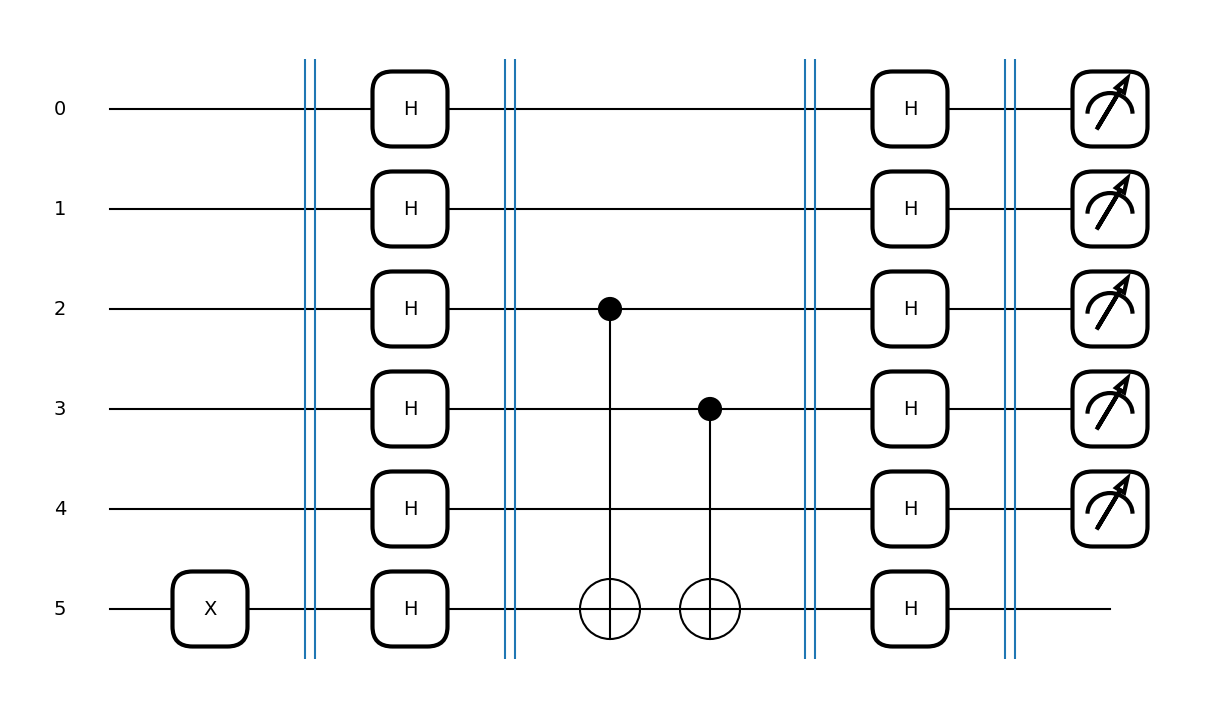

In [3]:
qml.draw_mpl(find_secret_string(secret_string))()

In [4]:
# https://quantumcomputing.stackexchange.com/questions/17273/how-do-i-construct-the-oracle-for-a-general-bernstein-vazirani-circuit

In [5]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circ():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.state()


circ()

tensor([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j], requires_grad=True)

In [6]:
print(qml.matrix(qml.Hadamard(wires=0)))

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [7]:
qml.matrix(qml.Hadamard(wires=0)) @ qml.matrix(qml.Hadamard(wires=1))

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

In [8]:
np.kron(qml.matrix(qml.Hadamard(wires=0)), qml.matrix(qml.Hadamard(wires=1))) @ [1, -1, -1, 1] * 1 / 2

array([0., 0., 0., 1.])